<a href="https://colab.research.google.com/github/sr606/Machine_Learning_CaseStudies/blob/main/Cars24_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('/content/drive/MyDrive/Files/used_cars_data.csv')
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [48]:
df.loc[:,['New_Price','Price']]

,New_Price,Price
0,NaN,1.75
1,NaN,12.50
2,8.61 Lakh,4.50
3,NaN,6.00
4,NaN,17.74
...,...,...
7248,NaN,NaN
7249,NaN,NaN
7250,NaN,NaN
7251,NaN,NaN


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [50]:
df.shape

(7253, 14)

In [51]:
print(f"Number of rows in my dataset are :{df.shape[0]}")
print(f'Number of columns in my dataset are: {df.shape[1]}')

Number of rows in my dataset are :7253
Number of columns in my dataset are: 14


In [52]:
df.describe(include='O')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,New_Price
count,7253,7253,7253,7253,7253,7251,7207,7207,1006
unique,2041,11,5,2,4,450,150,386,625
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,95.13 Lakh
freq,55,949,3852,5204,5952,207,732,280,6


In [53]:
df.drop(columns = 'S.No.', inplace= True)

In [54]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [55]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2013.365366,5.869906e+04,5.279722,9.479468
std,3.254421,8.442772e+04,0.811660,11.187917
min,1996.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.341600e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


1. how come minimum no of seats is 0
2. KM driven by car has very large distribution
3.S.No column dropped
4. Price column also has high range large distribution. Pssibly they could b having luxary cars

In [56]:
#checking for duplicates
duplicates  = df.duplicated()
df[duplicates]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6582,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,NaN,NaN


In [57]:
#droping duplicates
df.drop_duplicates(inplace= True)

In [58]:
df.nunique()  # df with all unique values counts of each columns

,0
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,450
Engine,150
Power,386


In [59]:
#check for missing values
df.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46
Power,46


In [60]:
(df.isnull().sum()/ (len(df))) * 100

,0
Name,0.000000
Location,0.000000
Year,0.000000
Kilometers_Driven,0.000000
Fuel_Type,0.000000
Transmission,0.000000
Owner_Type,0.000000
Mileage,0.027579
Engine,0.634308
Power,0.634308


In [61]:
#Lets do some cleanup

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [62]:
df = df.drop(['New_Price'], axis = 1)   #null values are more

In [63]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [64]:
df['Year'].dtype

dtype('int64')

In [65]:
#lets get age of car
#logic for that can be curent yr - year

from datetime import date

current_date = date.today().year
current_date

2025

In [66]:
df['Car_Age'] = current_date - df['Year']

In [67]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,12


there is lot of information in  one string in column Name

so we can separate brand and model

In [68]:
df['Name'][0]

'Maruti Wagon R LXI CNG'

In [69]:
df['Name'].str.split(" ")[0][0]

'Maruti'

In [70]:
df['Brand'] = df["Name"].str.split(" ").str.get(0)

In [71]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,15,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,10,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,14,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,13,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,12,Audi


In [72]:
df['Model'] = df['Name'].str.split(' ').str.get(1) + '' + df['Name'].str.split(' ').str.get(2)

In [73]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,15,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,10,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,14,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,13,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,12,Audi,A4New


In [74]:
df['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [75]:
#there some unknown beands extracted in brands list which are we are not familiar with e.g. Smart, Mini, Land etc. Lets get information of them
df["Brand"].isin(['Land','Mini','Mini','Smart','Isuzu', 'ISUZU'])

,Brand
0,False
1,False
2,False
3,False
4,False
...,...
7248,False
7249,False
7250,False
7251,False


In [76]:
df[df["Brand"].isin(['Land','Mini','Mini','Smart','Isuzu', 'ISUZU'])]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,27.00,11,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,17.50,13,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,23.00,8,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,55.76,7,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,35.67,8,Mini,CooperConvertible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.4 kmpl,2499 CC,134 bhp,5.0,NaN,8,ISUZU,D-MAXV-Cross
7132,Mini Clubman Cooper S,Pune,2017,2890,Petrol,Manual,First,13.8 kmpl,1998 CC,192 bhp,5.0,NaN,8,Mini,ClubmanCooper
7157,Land Rover Range Rover 2.2L Pure,Hyderabad,2015,49000,Diesel,Automatic,Second,12.7 kmpl,2179 CC,187.7 bhp,5.0,NaN,10,Land,RoverRange
7160,Mini Cooper Countryman D,Hyderabad,2013,50000,Diesel,Automatic,First,23.8 kmpl,1998 CC,112 bhp,5.0,NaN,12,Mini,CooperCountryman


In [77]:
df[df["Brand"].isin(['Land','Mini','Mini','Smart','Isuzu', 'ISUZU'])][['Name','Brand','Model']]

,Name,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Land,RoverFreelander
176,Mini Countryman Cooper D,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Land,RoverRange
228,Mini Cooper Convertible S,Mini,CooperConvertible
...,...,...,...
6919,ISUZU D-MAX V-Cross 4X4,ISUZU,D-MAXV-Cross
7132,Mini Clubman Cooper S,Mini,ClubmanCooper
7157,Land Rover Range Rover 2.2L Pure,Land,RoverRange
7160,Mini Cooper Countryman D,Mini,CooperCountryman


In [78]:
df['Brand'].replace({"(?i)^ISUZU$" : "Isuzu",
                     "(?i)^Mini$" : "Mini Cooper",
                     "(?i)^Land$" : "Land Rover"},
                    regex = True, inplace = True)


#if the string is there plz replcae it with whatever given instead

In [79]:
df[df["Brand"].isin(['Land','Mini','Mini','Smart','Isuzu', 'ISUZU'])][['Name','Brand','Model']]

,Name,Brand,Model
915,Smart Fortwo CDI AT,Smart,FortwoCDI
2900,Isuzu MUX 4WD,Isuzu,MUX4WD
3624,ISUZU D-MAX V-Cross 4X4,Isuzu,D-MAXV-Cross
5979,ISUZU D-MAX V-Cross 4X4,Isuzu,D-MAXV-Cross
6470,Isuzu MU 7 4x2 HIPACK,Isuzu,MU7
6919,ISUZU D-MAX V-Cross 4X4,Isuzu,D-MAXV-Cross


In [80]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [81]:
df['Fuel_Type'].value_counts()

,count
Fuel_Type,
Diesel,3852
Petrol,3324
CNG,62
LPG,12
Electric,2


In [82]:
df.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46
Power,46


In [83]:
df[df["Model"].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
7067,OpelCorsa 1.4Gsi,Hyderabad,2005,50000,Petrol,Manual,Second,14.2 kmpl,1389 CC,88 bhp,5.0,NaN,20,OpelCorsa,NaN


In [84]:
df[df['Price'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
6019,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,11,Maruti,AltoK10
6020,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,12,Maruti,Alto800
6021,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,NaN,8,Toyota,InnovaCrysta
6022,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN,13,Toyota,EtiosLiva
6023,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN,11,Hyundai,i20Magna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,14,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,10,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,13,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,12,Volkswagen,PoloGT


1)Imputation and then Analysis - it essentially add some form of impurity in my data which can affect my analysis

2)Analysis and Then Imputation

##**Analysis:**

In [85]:
#which brandc is most popular brand wihtin Cars4u

df["Brand"].value_counts()

,count
Brand,
Maruti,1444
Hyundai,1340
Honda,742
Toyota,507
Mercedes-Benz,380
Volkswagen,374
Ford,351
Mahindra,331
BMW,312


In [86]:
df[df['Price'].isnull()]['Brand'].value_counts()

,count
Brand,
Maruti,233
Hyundai,233
Honda,134
Toyota,96
Mercedes-Benz,62
Mahindra,59
Volkswagen,59
Ford,51
Audi,49


In [87]:
df["Model"].value_counts()

,count
Model,
SwiftDzire,189
Grandi10,179
WagonR,178
Innova2.5,145
Verna1.6,127
...,...
CR-VPetrol,1
CLA45,1
AltoXCITE,1


In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7252.0,2013.365830,3.254405,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7252.0,58699.986900,84433.505524,171.00,34000.0,53429.00,73000.00,6500000.0
Seats,7199.0,5.279761,0.811709,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0
Car_Age,7252.0,11.634170,3.254405,6.00,9.0,11.00,14.00,29.0


In [89]:
df.describe(include = 'O').T

,count,unique,top,freq
Name,7252,2041,Mahindra XUV500 W8 2WD,55
Location,7252,11,Mumbai,948
Fuel_Type,7252,5,Diesel,3852
Transmission,7252,2,Manual,5203
Owner_Type,7252,4,First,5951
Mileage,7250,450,17.0 kmpl,206
Engine,7206,150,1197 CC,732
Power,7206,386,74 bhp,280
Brand,7252,32,Maruti,1444
Model,7251,726,SwiftDzire,189


In [90]:
cat_cols = df.select_dtypes(include = ['object']).columns
num_cols = df.select_dtypes(include = np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Brand', 'Model'],
      dtype='object')
Numerical variables:
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Car_Age']


##Univariate Analysis

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

Year
Skew : -0.84


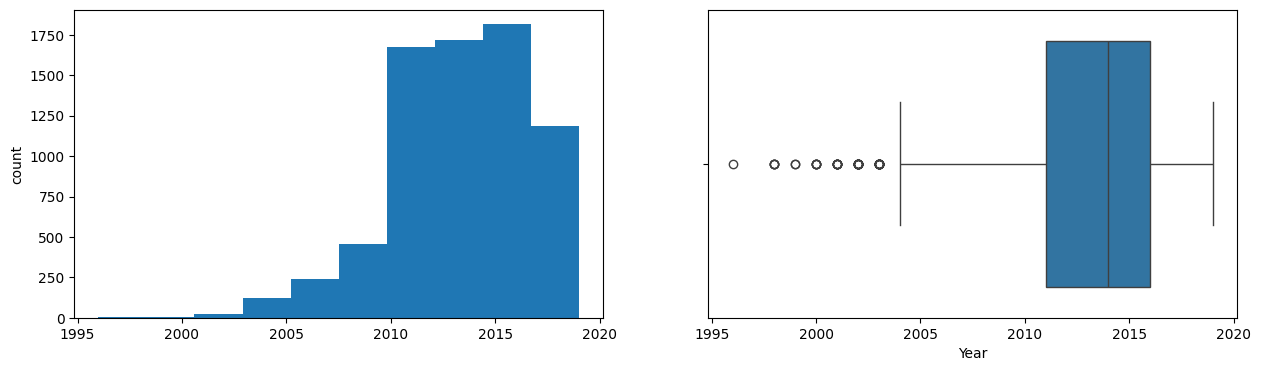

Kilometers_Driven
Skew : 61.58


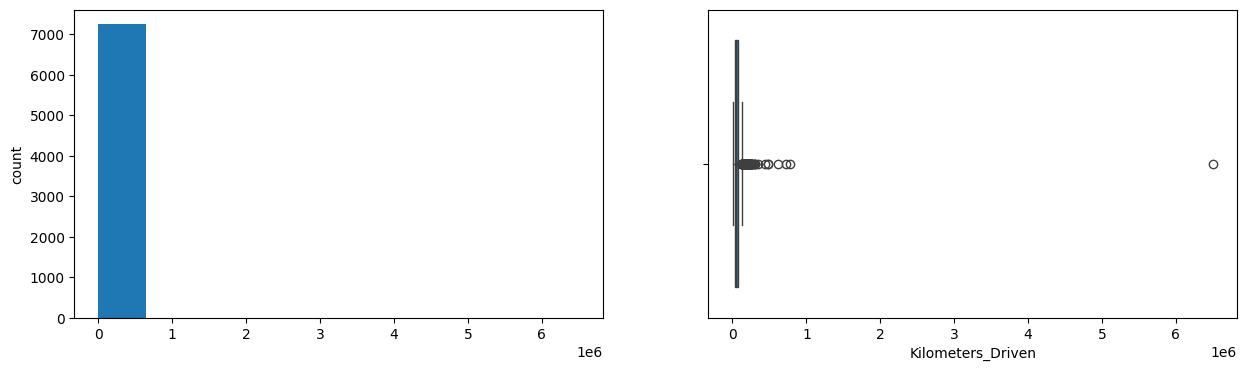

Seats
Skew : 1.9


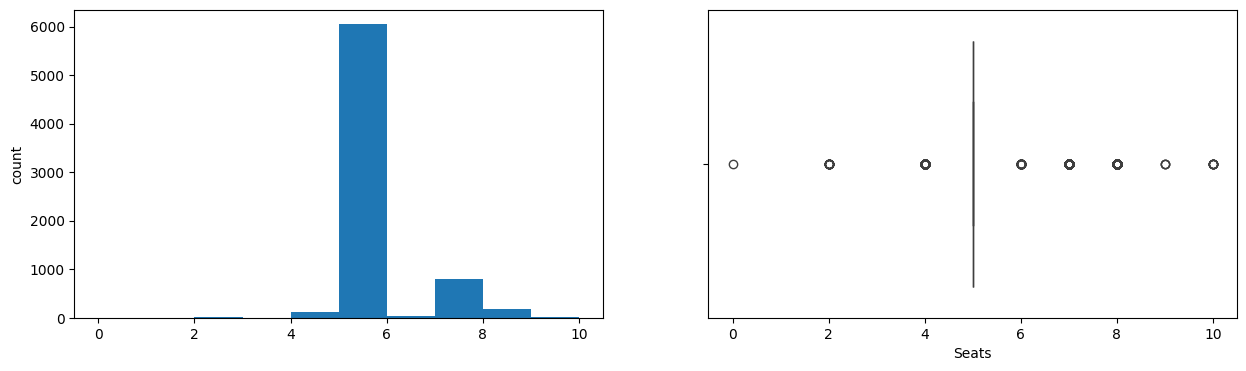

Price
Skew : 3.34


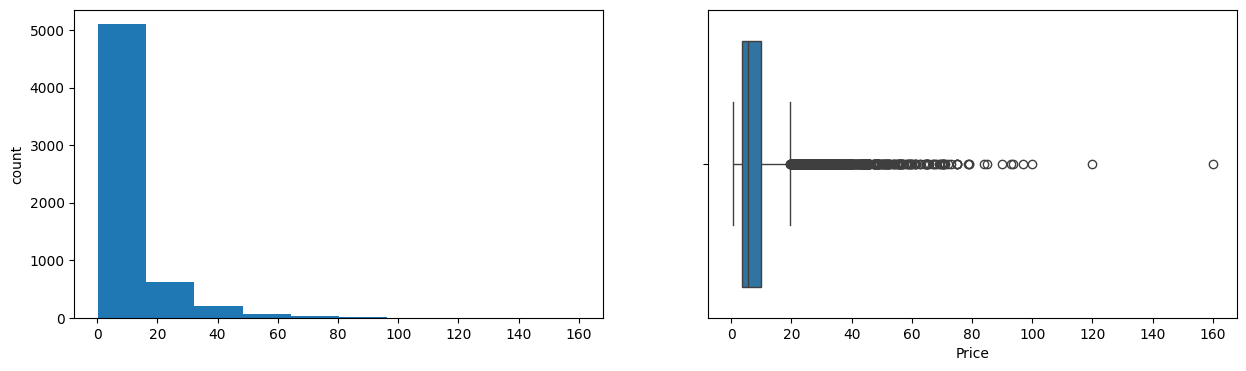

Car_Age
Skew : 0.84


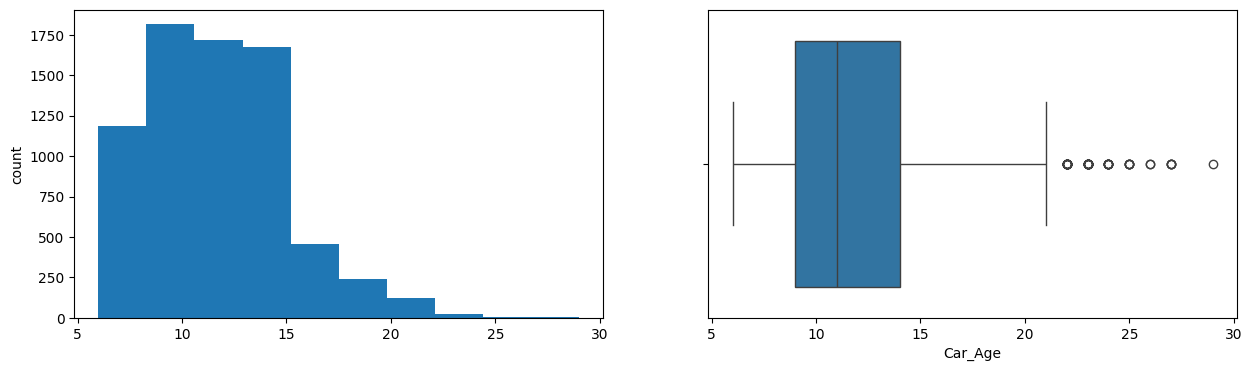

In [92]:
for col in num_cols:
  print(col)
  print('Skew :', round(df[col].skew(), 2))
  plt.figure(figsize = (15,4))
  plt.subplot(1,2,1)
  df[col].hist(grid = False)
  plt.ylabel('count')
  plt.subplot(1,2,2)
  sns.boxplot(x = df[col])
  plt.show()

In [93]:
df[df['Kilometers_Driven'] == df['Kilometers_Driven'].max()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993 CC,258 bhp,5.0,65.0,8,BMW,X5xDrive


<Axes: ylabel='Kilometers_Driven'>

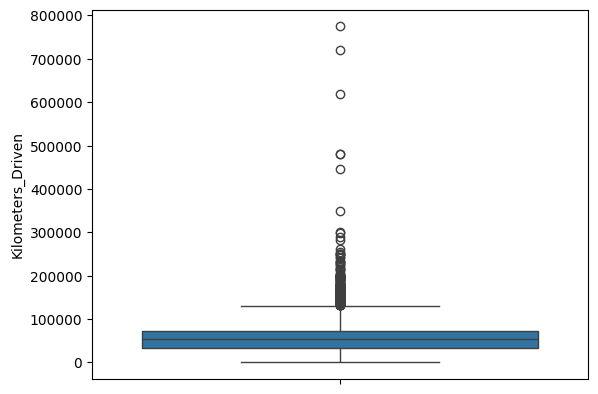

In [95]:
sns.boxplot(df[df['Kilometers_Driven'] != df['Kilometers_Driven'].max()]['Kilometers_Driven'])

<Axes: xlabel='Kilometers_Driven', ylabel='Density'>

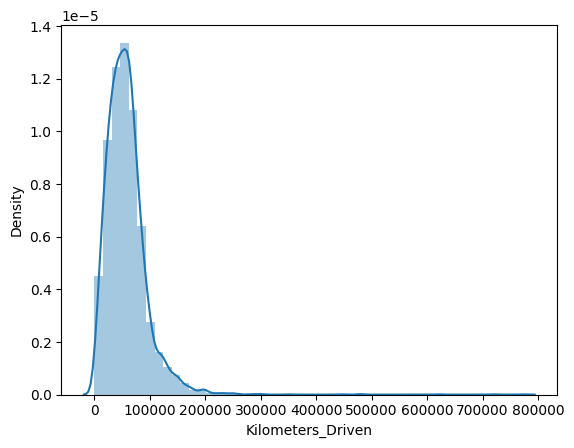

In [96]:
sns.distplot(df[df['Kilometers_Driven'] != df['Kilometers_Driven'].max()]['Kilometers_Driven'])

In [97]:
df[df['Price'] > 140]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Brand,Model
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33 kmpl,2993 CC,255 bhp,5.0,160.0,8,Land Rover,RoverRange


##BI - Variate Analysis

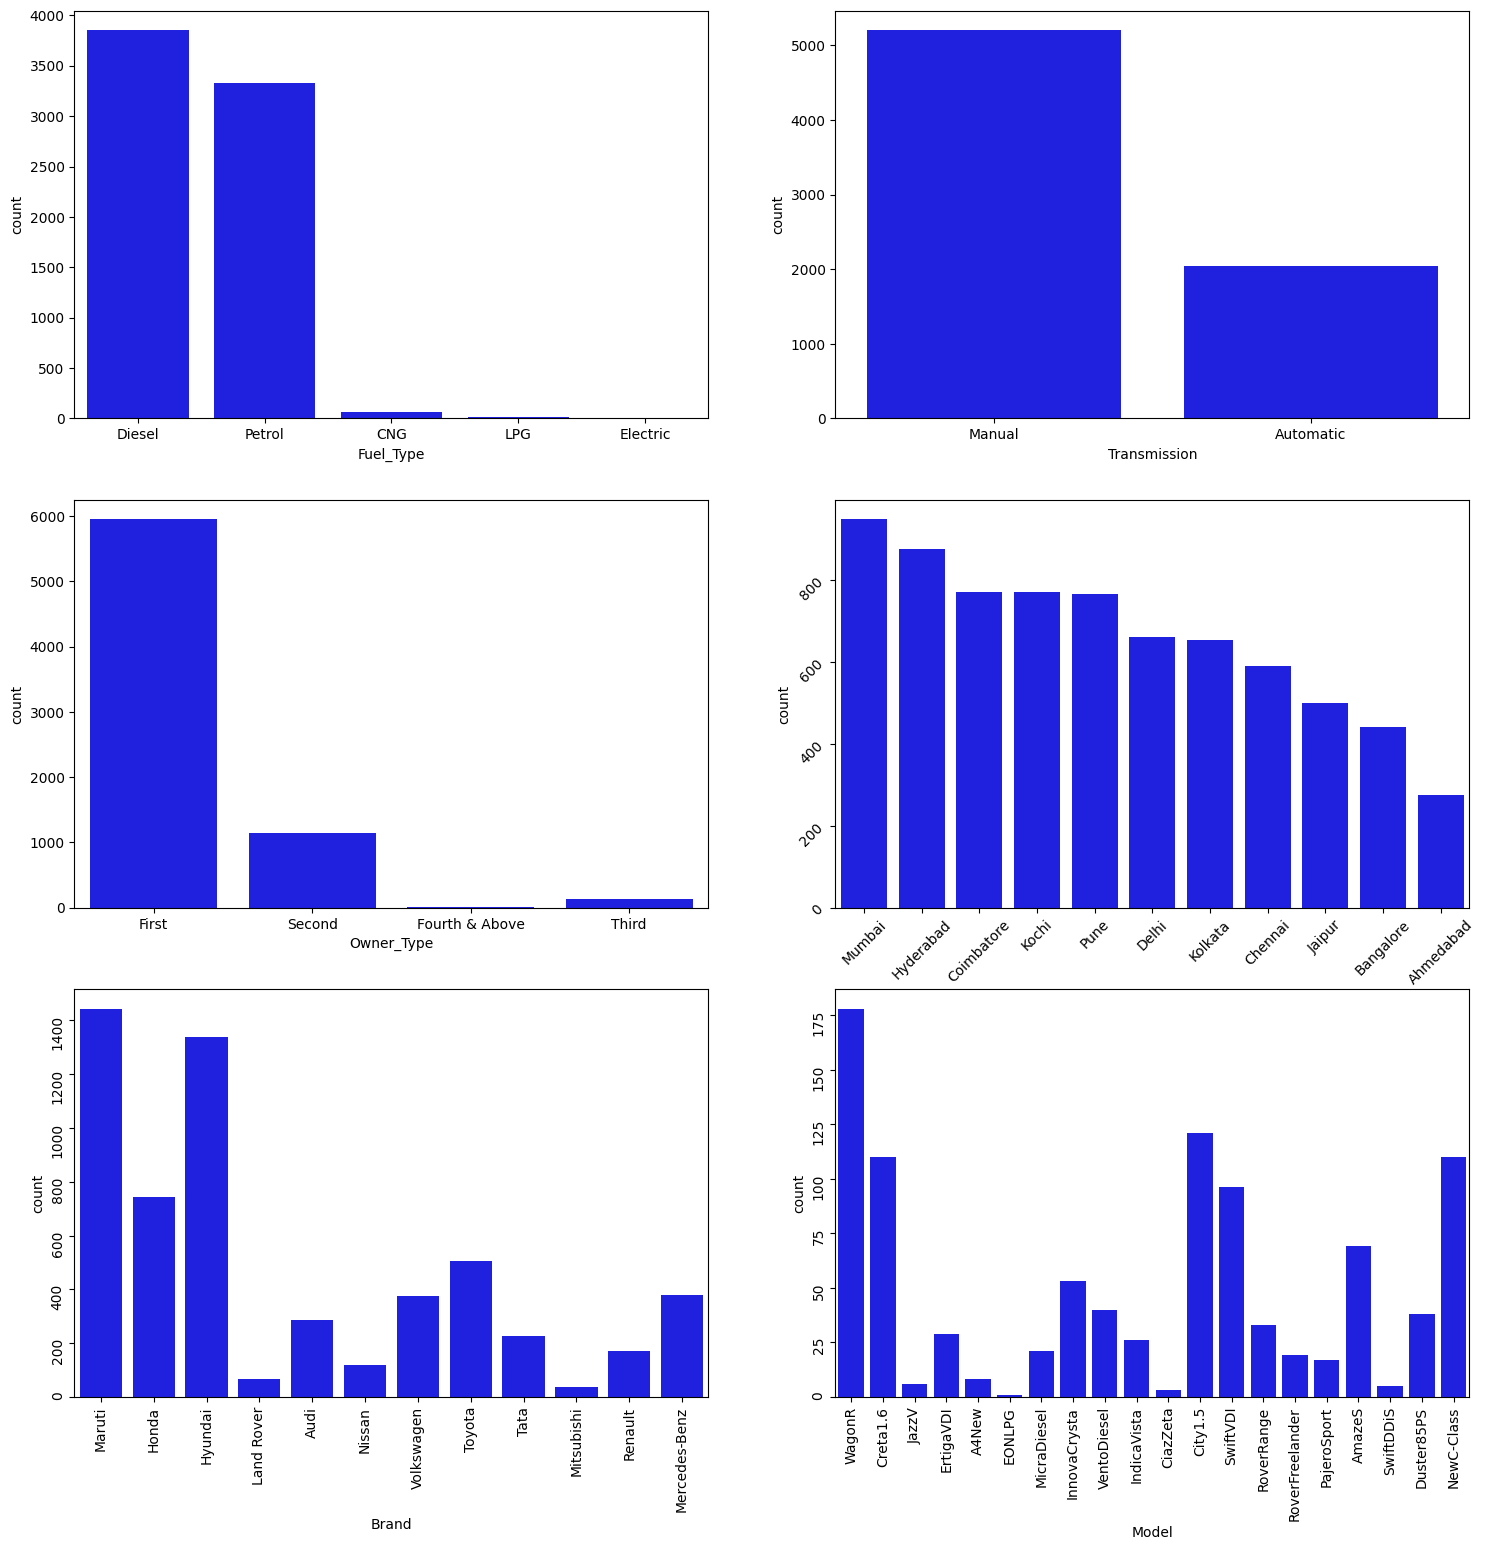

In [99]:
fig, axes = plt.subplots(3, 2, figsize = (18,18))
sns.countplot(ax = axes[0,0], x = 'Fuel_Type', data = df, color = 'blue',
              order = df['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0,1], x = 'Transmission', data = df, color = 'blue',
              order = df['Transmission'].value_counts().index);
sns.countplot(ax = axes[1,0], x = 'Owner_Type' , data = df, color = 'blue');
sns.countplot(ax = axes[1,1], x = 'Location', data = df, color = 'blue',
              order = df['Location'].value_counts().index);
sns.countplot(ax = axes[2,0], x = 'Brand', data = df, color = 'blue',
              order = df['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2,1], x = 'Model', data = df, color = 'blue',
              order = df['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation = 45);
axes[2][0].tick_params(labelrotation = 90);
axes[2][1].tick_params(labelrotation = 90);

1. Mubai ha highest no of cars available for purchase, followed by Hyderabad and Coimbatore.

2. ~53% of cars have fuel type as Diesel this shows that cars provide higher performance

3. !=~72% of cards are First owned cars. This shows most of the buyers prefer to purchase first- owner cars

4. ~82% of cars are First owned cars. This shows most of the buyers prefer to purchase first- owner cars

5. ~20% of cars belong to the brand Maruti followed by 19% of cars belonging to Hyundai

6. WagonR ranks first among all models which are available for purchase

##Transformatuion on Skewed data

In [101]:
#Function for log tranformation of the column
def log_tranform(df,col):
  for colname in col:
    if (df[colname] == 1.0).all():
      df[colname + '_log'] = np.log(df[colname] + 1)
    else:
      df[colname + '_log'] = np.log(df[colname])
  df.info()

In [102]:
log_tranform(df,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Index: 7252 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7252 non-null   object 
 1   Location               7252 non-null   object 
 2   Year                   7252 non-null   int64  
 3   Kilometers_Driven      7252 non-null   int64  
 4   Fuel_Type              7252 non-null   object 
 5   Transmission           7252 non-null   object 
 6   Owner_Type             7252 non-null   object 
 7   Mileage                7250 non-null   object 
 8   Engine                 7206 non-null   object 
 9   Power                  7206 non-null   object 
 10  Seats                  7199 non-null   float64
 11  Price                  6019 non-null   float64
 12  Car_Age                7252 non-null   int64  
 13  Brand                  7252 non-null   object 
 14  Model                  7251 non-null   object 
 15  Kilometer

<Axes: xlabel='Kilometers_Driven_log', ylabel='Density'>

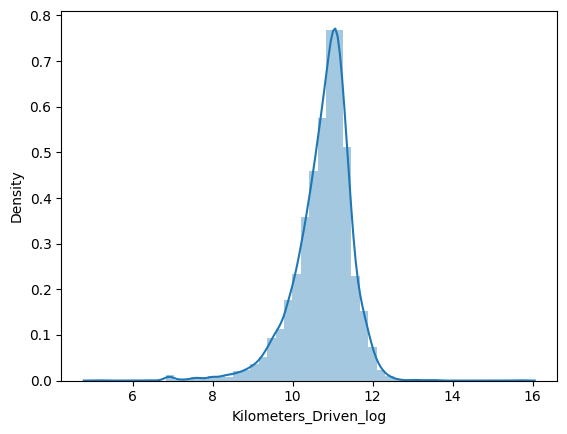

In [103]:
#Log Transformation of the feature 'Kilometers_Driven'
sns.distplot(df['Kilometers_Driven_log'], axlabel = 'Kilometers_Driven_log')

<Axes: xlabel='Price Log', ylabel='Density'>

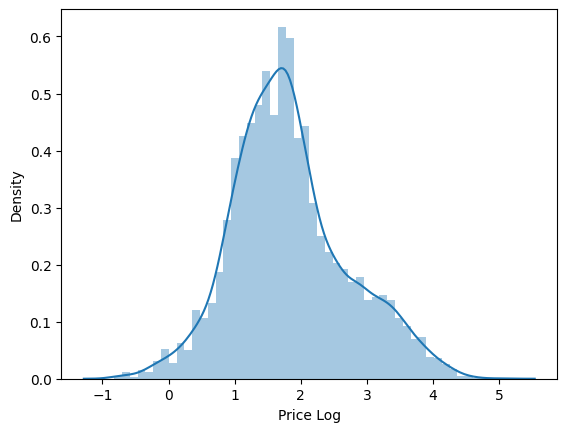

In [104]:
sns.distplot(df['Price_log'], axlabel = 'Price Log')

compare price with location , price with trnmision, etc.....

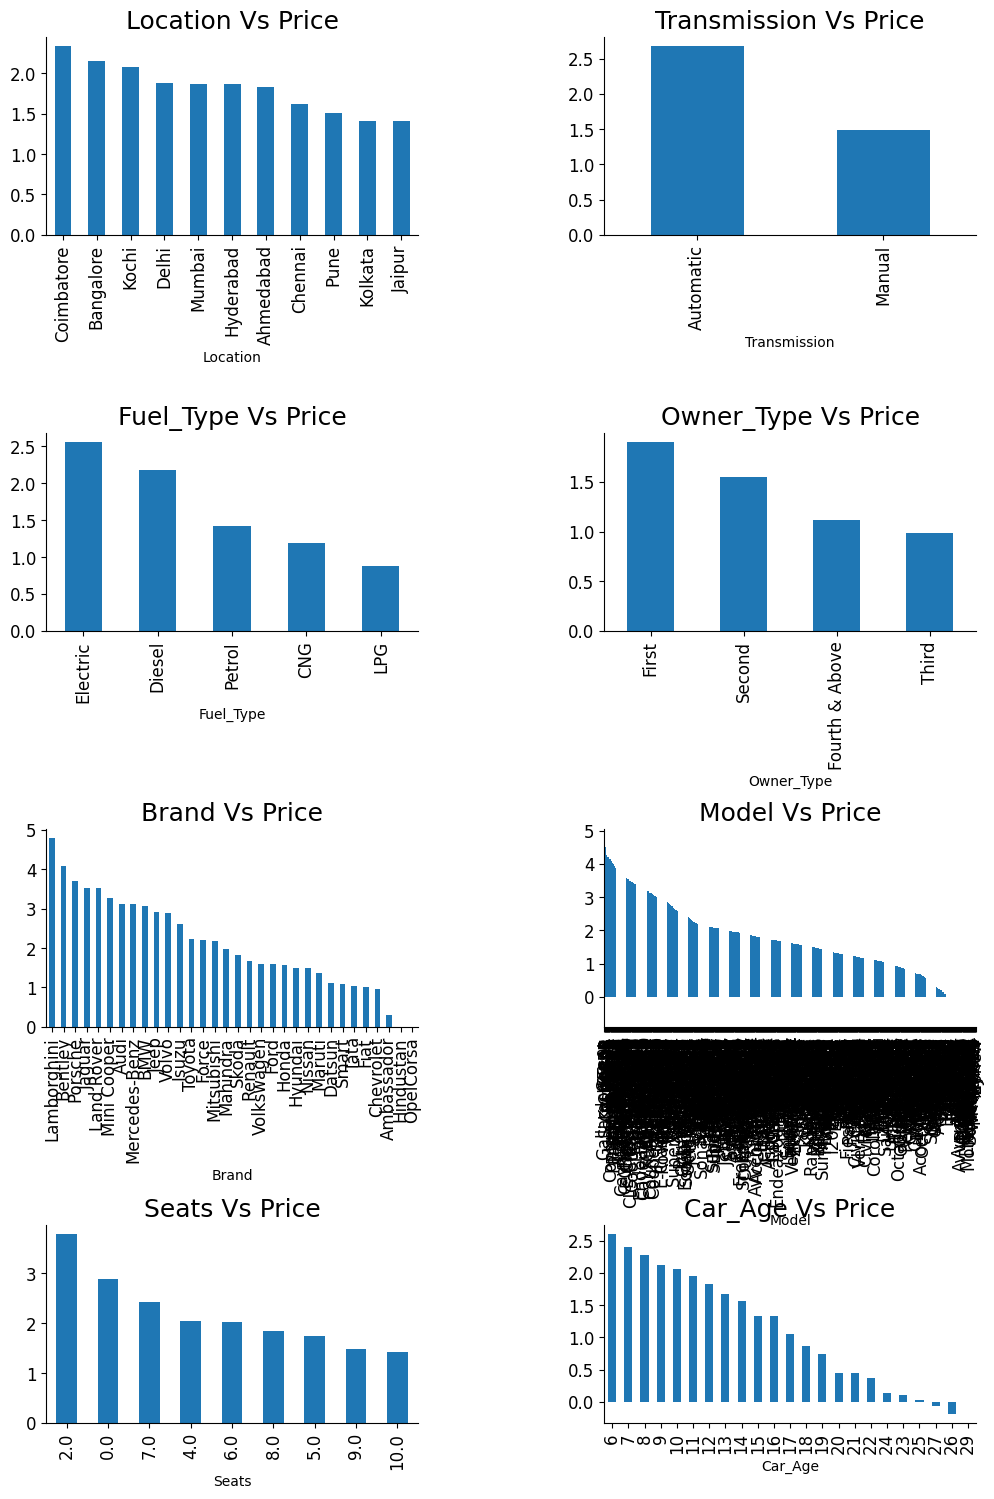

In [109]:
fig, axarr = plt.subplots(4,2, figsize= (12,18))
df.groupby('Location')['Price_log'].mean().sort_values(ascending = False).plot.bar(ax = axarr[0][0], fontsize =12)
axarr[0][0].set_title('Location Vs Price', fontsize = 18)
df.groupby('Transmission')['Price_log'].mean().sort_values(ascending = False).plot.bar(ax = axarr[0][1], fontsize =12)
axarr[0][1].set_title('Transmission Vs Price', fontsize = 18)
df.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending = False).plot.bar(ax = axarr[1][0], fontsize =12)
axarr[1][0].set_title('Fuel_Type Vs Price', fontsize = 18)
df.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending = False).plot.bar(ax = axarr[1][1], fontsize =12)
axarr[1][1].set_title('Owner_Type Vs Price', fontsize = 18)
df.groupby('Brand')['Price_log'].mean().sort_values(ascending = False).plot.bar(ax = axarr[2][0], fontsize =12)
axarr[2][0].set_title('Brand Vs Price', fontsize = 18)
df.groupby('Model')['Price_log'].mean().sort_values(ascending = False).plot.bar(ax = axarr[2][1], fontsize =12)
axarr[2][1].set_title('Model Vs Price', fontsize = 18)
df.groupby('Seats')['Price_log'].mean().sort_values(ascending = False).plot.bar(ax = axarr[3][0], fontsize =12)
axarr[3][0].set_title('Seats Vs Price', fontsize = 18)
df.groupby('Car_Age')['Price_log'].mean().sort_values(ascending = False).plot.bar(ax = axarr[3][1], fontsize =12)
axarr[3][1].set_title('Car_Age Vs Price', fontsize = 18)
plt.subplots_adjust(hspace = 1.0)
plt.subplots_adjust(wspace = .5)
sns.despine()

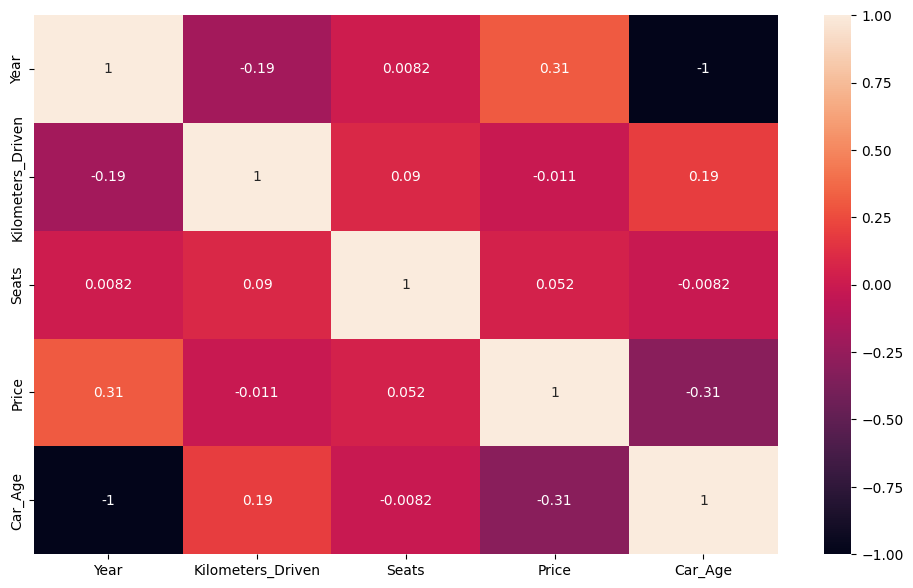

In [110]:
plt.figure(figsize=(12, 7))
sns.heatmap(df[num_cols].corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [ ]:
#further some extra work can be done

In [ ]:
#Goal : to predict the car sales for a given model, brand, year,....